# CE888 Assignment 1 for Demo

This code is written to demonstarte data analysis made for ce888 assignment 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 17 February 2019<br> 

In [20]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

# import original libraries
sys.path.append("../")

import assignment1_main as MAIN
import load_data as DATA
import histogram as HST
import correlation as CRRL
import classifier as CLS
import feature_importance as IMP

## 1. Load Data
Load data from **data** directory.<br>
Reading and preprocessing data into pandas.DataFrame are done by respective python files.<br>
#### Returned variables<br>
>`col_names` : List --- Name of the columns (including target column)<br>
`features_df` : DataFrame --- Feature values<br>
`targets_df` : DataFrame --- Target values<br>
`data_df` : DataFrame --- The whole data containing both features and targets<br>
`pic_file`: String --- Prefix for file name (data name + timestamp)<br>
`unique_labels` : List --- Column haeders containing feature names and terget name ("Class")
>

#### Select data to load (Argument `data_id`)
> 0. Human Activity
1. Spam
2. Phishing
>

In [35]:
data_id = int(input("Select the data to load (0: human activity, 1: spam, 2: phishing): "))

col_names, features_df, targets_df, data_df, pic_file = DATA.load_data(data_id=data_id)
unique_labels = DATA.verify_data(data_df, targets_df)
data_df.head(5)

Select the data to load (0: human activity, 1: spam, 2: phishing): 2
Number of NaN: 0
Data shape:  (11055, 31)
Target labels: [-1.  1.]


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,-1.0
2,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
3,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
4,1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0


## 2. Analyse the Data

### 2-1. Data Structure
#### (1) Feature distribution

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


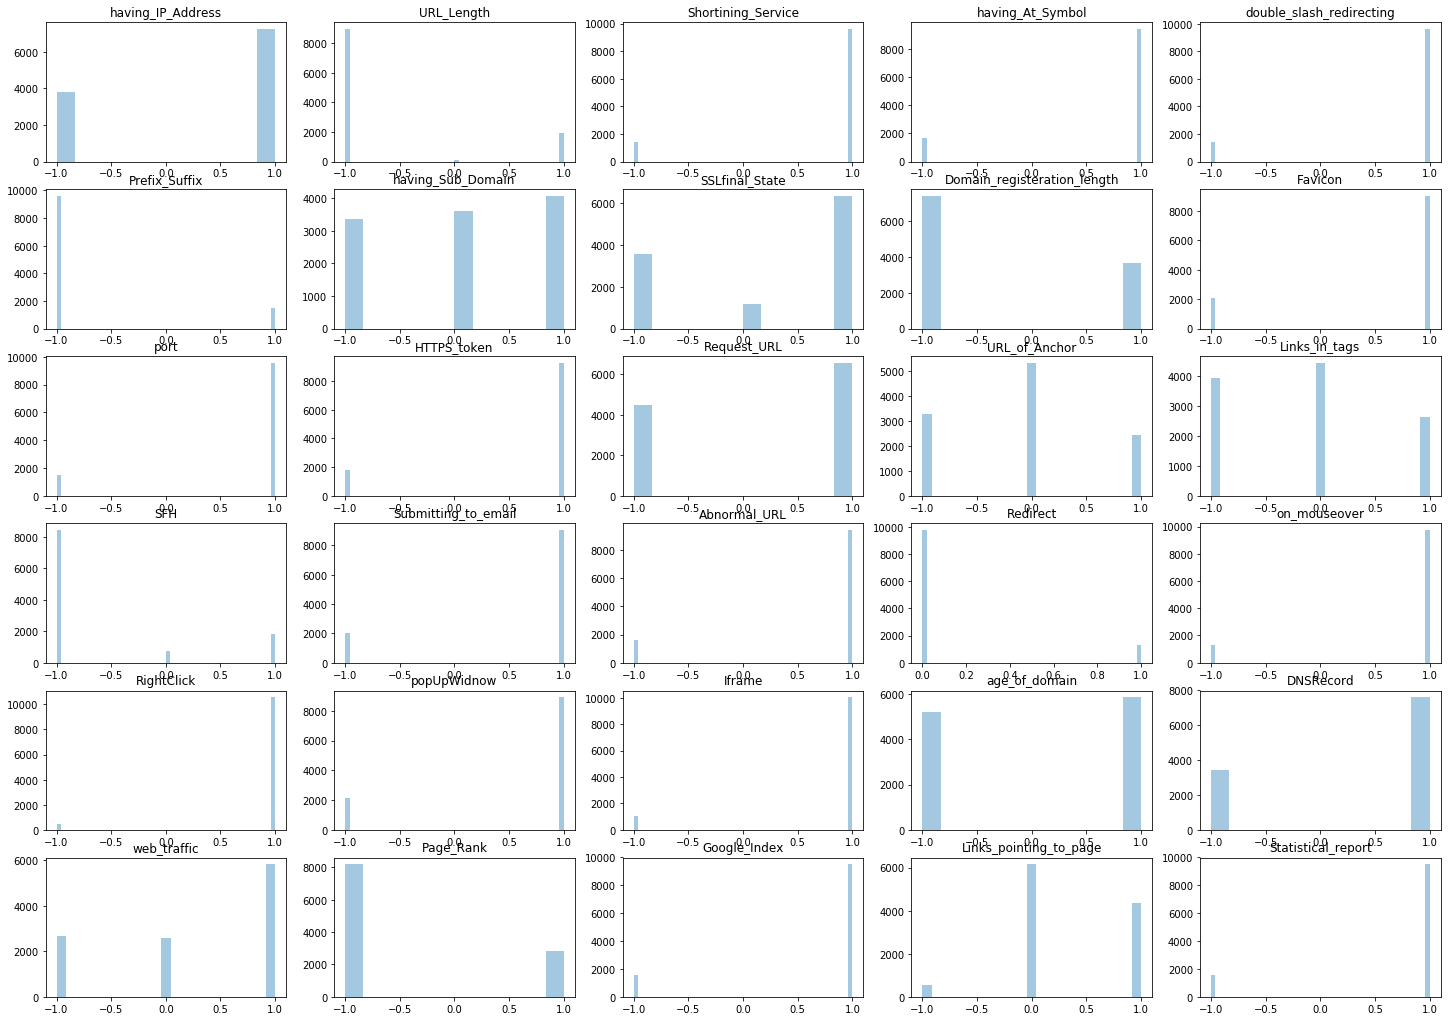

In [36]:
HST.histogram(data_df[data_df.columns[:-1]], pic_file, "_features")

#### (2) Target distribution

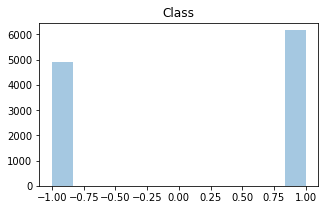

In [37]:
HST.histogram(data_df[data_df.columns[-1:]], pic_file, "_targets")

#### (3) Correlation among features

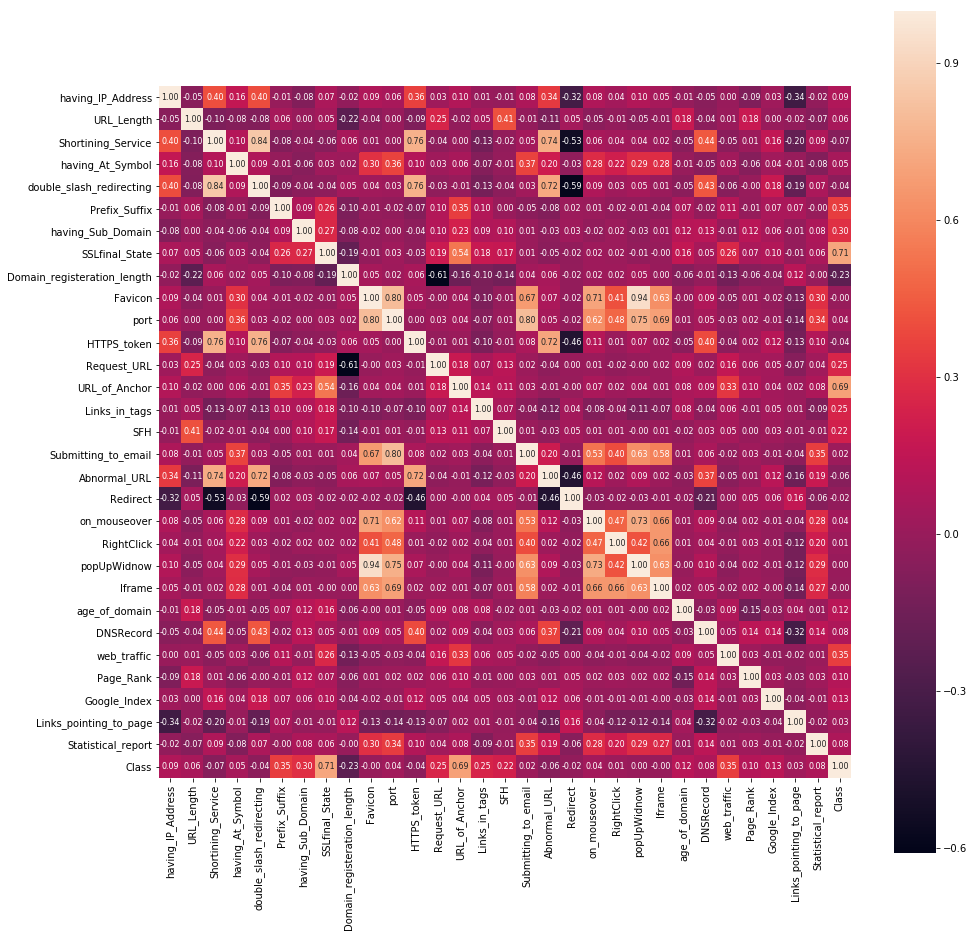

In [38]:
cr_np = CRRL.correlation(data_df)
CRRL.cr_heatmap (cr_np, pic_file, col_names)

### 2-2. Feature importance
#### (1) Correlation with the target

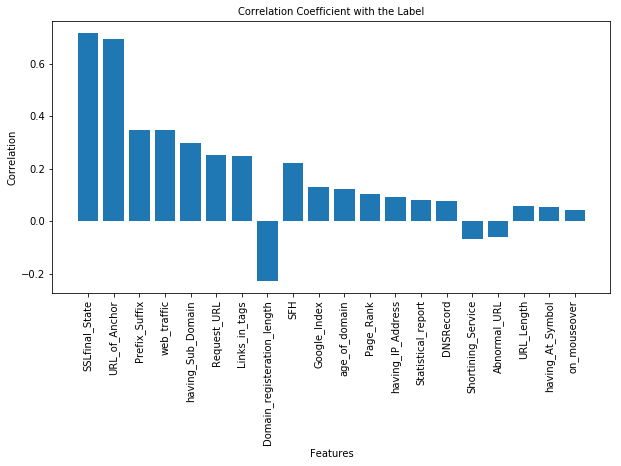

In [39]:
CRRL.cr_bar_graph (cr_np, pic_file, col_names)

#### (2) Feature Importance based on Decision Tree

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


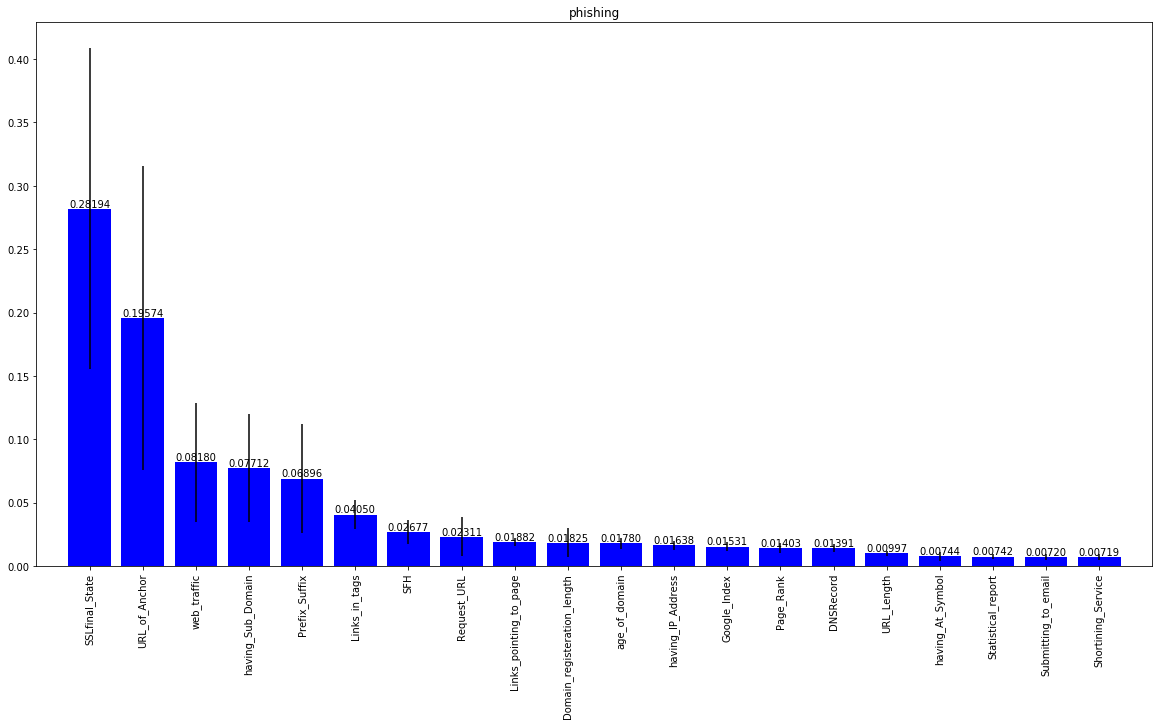

In [40]:
clf = CLS.train (features_df, targets_df, 0)[-1]
IMP.feature_importance(clf, col_names, pic_file, pic_file.split("_")[0])

### 2-3. Classification with small training data
#### Obtain minimal size data

In [45]:
X, y = MAIN.get_minimal_data(features_df.values, targets_df.values)
#X, y = features_df.values, targets_df.values

ratio: 0.018362731795567615
Minimul size of the data for 30 features: 290
The size of the data used for classification: 203


#### (1) Decision Tree

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


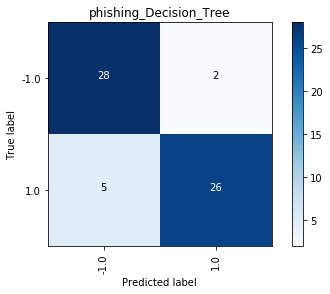

              precision    recall  f1-score   support

        -1.0       0.85      0.93      0.89        30
         1.0       0.93      0.84      0.88        31

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
title = "%s_Decision_Tree" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 0)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Decision_Tree")
clf

#### (2) Naive Bayes

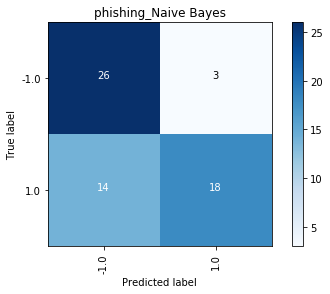

              precision    recall  f1-score   support

        -1.0       0.65      0.90      0.75        29
         1.0       0.86      0.56      0.68        32

   micro avg       0.72      0.72      0.72        61
   macro avg       0.75      0.73      0.72        61
weighted avg       0.76      0.72      0.71        61



GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
title = "%s_Naive Bayes" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 1)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Naive Bayes")
clf

#### (3) SVM

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


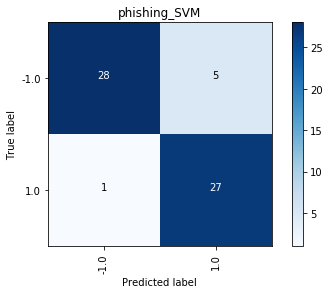

              precision    recall  f1-score   support

        -1.0       0.97      0.85      0.90        33
         1.0       0.84      0.96      0.90        28

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
title = "%s_SVM" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 2)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "SVM")
clf